In [1]:
import random
import json
import os
import sys
from rouge import Rouge

# 4 undoable tasks generated by src/generate_task.py
with open('task_1.json', 'r') as file:
    task_1_undo_entries = json.load(file)

with open('task_2.json', 'r') as file:
    task_2_undo_entries = json.load(file)

with open('task_3.json', 'r') as file:
    task_3_undo_entries = json.load(file)

with open('task_4.json', 'r') as file:
    task_4_undo_entries = json.load(file)


for entry in task_1_undo_entries:
    entry["category"] = 1
for entry in task_2_undo_entries:
    entry["category"] = 2
for entry in task_3_undo_entries:
    entry["category"] = 3
for entry in task_4_undo_entries:
    entry["category"] = 4

print(task_1_undo_entries[0])


def calculate_rouge_l_similarity(text1, text2):
    rouge = Rouge()
    scores = rouge.get_scores(text1, text2)
    return scores[0]['rouge-l']['f']  

def deduplicate_entries(entries, similarity_threshold=0.7):
    unique_entries = []
    show_duplicate_number = 0
    for current_entry in entries:
        is_duplicate = False
        for unique_entry in unique_entries:
            similarity = calculate_rouge_l_similarity(current_entry["prompt"], unique_entry["prompt"])
            if similarity > similarity_threshold:
                is_duplicate = True
                if show_duplicate_number <= 4:
                    show_duplicate_number += 1
                    print(f"Duplicate found: {current_entry['prompt']} vs {unique_entry['prompt']}")
                break
        if not is_duplicate:
            unique_entries.append(current_entry)
    return unique_entries


{'prompt': 'Plant a tree in the backyard,', 'category': 1}


In [2]:
task_1_undo_deuplicated = deduplicate_entries(task_1_undo_entries)
print(f"Original entries: {len(task_1_undo_entries)}, Unique entries: {len(task_1_undo_deuplicated)}")

task_2_undo_deuplicated = deduplicate_entries(task_2_undo_entries)
print(f"Original entries: {len(task_2_undo_entries)}, Unique entries: {len(task_2_undo_deuplicated)}")

task_3_undo_deuplicated = deduplicate_entries(task_3_undo_entries)
print(f"Original entries: {len(task_3_undo_entries)}, Unique entries: {len(task_3_undo_deuplicated)}")

task_4_undo_deuplicated = deduplicate_entries(task_4_undo_entries)
print(f"Original entries: {len(task_4_undo_entries)}, Unique entries: {len(task_4_undo_deuplicated)}")

Duplicate found: Plant a tree in the backyard, vs Plant a tree in the backyard,
Duplicate found: Bake a chocolate cake from scratch, vs Bake a chocolate cake from scratch,
Duplicate found: Paint a landscape on a canvas, vs Paint a landscape on canvas,
Duplicate found: Ride a bicycle around the park, vs Ride a bicycle around the park,
Duplicate found: Swim ten laps in a swimming pool, vs Swim 20 laps in a pool,
Original entries: 1144, Unique entries: 764
Duplicate found: Book a table for two at an Italian restaurant nearby for tonight. vs Reserve a table for two at an Italian restaurant in downtown Chicago tonight.
Duplicate found: Update my LinkedIn profile with my latest job experience. vs Update my LinkedIn profile with a new job position.
Duplicate found: Schedule a virtual doctor's appointment for next week. vs Schedule a virtual doctor's appointment.
Duplicate found: Order a birthday cake from a local bakery for delivery. vs Order a birthday cake for delivery tomorrow.
Duplicate f

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


model = SentenceTransformer('all-MiniLM-L6-v2')

def remove_semantic_duplicates(data, threshold=0.7):
    """ Deduplicates a list of prompts based on their semantic similarity."""
    sentences = [item['prompt'] for item in data]
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(sentences)
    similarity_matrix = cosine_similarity(embeddings)

    unique_sentence_indices = []
    for i in range(len(similarity_matrix)):
        if not any(similarity_matrix[i][j] > threshold for j in unique_sentence_indices):
            unique_sentence_indices.append(i)

    unique_sentences = [sentences[i] for i in unique_sentence_indices]
    return unique_sentences


/Users/zihang/anaconda3/envs/doable/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
task_1_undo_deuplicated = remove_semantic_duplicates(task_1_undo_deuplicated)
print(f"Unique entries after removing semantic duplicates: {len(task_1_undo_deuplicated)}")

task_2_undo_deuplicated = remove_semantic_duplicates(task_2_undo_deuplicated)
print(f"Unique entries after removing semantic duplicates: {len(task_2_undo_deuplicated)}")

task_3_undo_deuplicated = remove_semantic_duplicates(task_3_undo_deuplicated)
print(f"Unique entries after removing semantic duplicates: {len(task_3_undo_deuplicated)}")

task_4_undo_deuplicated = remove_semantic_duplicates(task_4_undo_deuplicated)
print(f"Unique entries after removing semantic duplicates: {len(task_4_undo_deuplicated)}")

Unique entries after removing semantic duplicates: 522
Unique entries after removing semantic duplicates: 576
Unique entries after removing semantic duplicates: 545
Unique entries after removing semantic duplicates: 538


In [5]:
# save to file in format {"prompt": "xxx"}

with open('task_1_unique.json', 'w') as file:
    task_1_undo_deuplicated = [{"prompt": item} for item in task_1_undo_deuplicated]
    for entry in task_1_undo_deuplicated:
        entry["category"] = 1
    print(task_1_undo_deuplicated[0])
    json.dump(task_1_undo_deuplicated, file, indent=4)

with open('task_2_unique.json', 'w') as file:
    task_2_undo_deuplicated = [{"prompt": item} for item in task_2_undo_deuplicated]
    for entry in task_2_undo_deuplicated:
        entry["category"] = 2
    json.dump(task_2_undo_deuplicated, file, indent=4)

with open('task_3_unique.json', 'w') as file:
    task_3_undo_deuplicated = [{"prompt": item} for item in task_3_undo_deuplicated]
    for entry in task_3_undo_deuplicated:
        entry["category"] = 3
    json.dump(task_3_undo_deuplicated, file, indent=4)

with open('task_4_unique.json', 'w') as file:
    task_4_undo_deuplicated = [{"prompt": item} for item in task_4_undo_deuplicated]
    for entry in task_4_undo_deuplicated:
        entry["category"] = 4
    json.dump(task_4_undo_deuplicated, file, indent=4)

{'prompt': 'Plant a tree in the backyard,', 'category': 1}


Task 1 lengths: {7: 85, 9: 29, 6: 102, 8: 74, 5: 112, 11: 4, 4: 85, 10: 2, 12: 2, 3: 26, 1: 1}


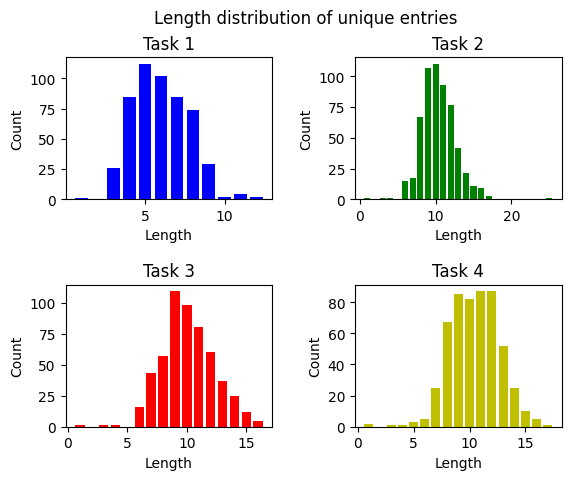

In [6]:

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") 

def count_lengths(data):
    lengths = [len(tokenizer.tokenize(item['prompt'])) for item in data]
    length_counts = {}
    for length in lengths:
        length_counts[length] = length_counts.get(length, 0) + 1
    return length_counts

task_1_lengths = count_lengths(task_1_undo_deuplicated)
task_2_lengths = count_lengths(task_2_undo_deuplicated)
task_3_lengths = count_lengths(task_3_undo_deuplicated)
task_4_lengths = count_lengths(task_4_undo_deuplicated)

print("Task 1 lengths:", task_1_lengths)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
fig.suptitle('Length distribution of unique entries')
axs[0, 0].bar(task_1_lengths.keys(), task_1_lengths.values(), color='b')
axs[0, 0].set_title('Task 1')
axs[0, 1].bar(task_2_lengths.keys(), task_2_lengths.values(), color='g')
axs[0, 1].set_title('Task 2')
axs[1, 0].bar(task_3_lengths.keys(), task_3_lengths.values(), color='r')
axs[1, 0].set_title('Task 3')
axs[1, 1].bar(task_4_lengths.keys(), task_4_lengths.values(), color='y')
axs[1, 1].set_title('Task 4')

for ax in axs.flat:
    ax.set(xlabel='Length', ylabel='Count')

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()



⬆️  length distribution of 4 kinds of undoable tasks

Total number of undoable entries: 2054
All lengths of undoable: {7: 170, 9: 330, 6: 138, 8: 265, 5: 115, 11: 264, 10: 292, 12: 226, 16: 19, 14: 71, 13: 131, 15: 33}


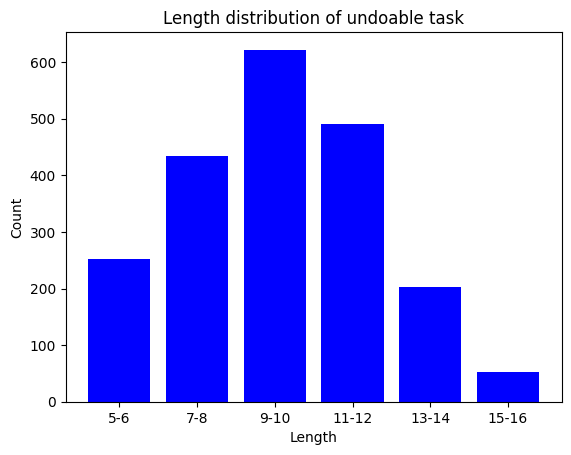

In [7]:

undoable = task_1_undo_deuplicated + task_2_undo_deuplicated + task_3_undo_deuplicated + task_4_undo_deuplicated


undoable = [item for item in undoable if 5 <= len(tokenizer.tokenize(item['prompt'])) <= 16]



print(f"Total number of undoable entries: {len(undoable)}")


all_lengths = count_lengths(undoable)
print("All lengths of undoable:", all_lengths)
combined_counts = {}


for length in range(5, 17, 2):  
    
    next_length = length + 1
    combined_count = all_lengths.get(length, 0) + all_lengths.get(next_length, 0)
    combined_key = f"{length}-{next_length}"
    combined_counts[combined_key] = combined_count

plt.bar(combined_counts.keys(), combined_counts.values(), color='b')
plt.title('Length distribution of undoable task')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


In [8]:
# load the doable_tasks.json generated by src/generate_task.py
with open('task_doable_generated.json', 'r') as file:
    doable_tasks = json.load(file)

for item in doable_tasks:
    item['category'] = 5

print(len(doable_tasks))
print(doable_tasks[0])

2140
{'prompt': "Generate a list of 10 possible topics for a beginner's blog on gardening.", 'category': 5}


In [9]:
print("Undoable task 1: ",len(task_1_undo_deuplicated))
print("Undoable task 2: ",len(task_2_undo_deuplicated))
print("Undoable task 3: ",len(task_3_undo_deuplicated))
print("Undoable task 4: ",len(task_4_undo_deuplicated))

Undoable task 1:  522
Undoable task 2:  576
Undoable task 3:  545
Undoable task 4:  538


In [10]:
# Data balance
undoable_task = task_1_undo_deuplicated + task_2_undo_deuplicated + task_3_undo_deuplicated + task_4_undo_deuplicated

print(len(undoable_task))
print(count_lengths(undoable_task))

minimum_length = min(count_lengths(doable_tasks))
maximum_length = max(count_lengths(undoable_task))
print(f"Minimum length of doable_tasks: {minimum_length}")
print(f"Maximum length of undoable_task: {maximum_length}")

doable_task_set_length = [item for item in doable_tasks if maximum_length >= len(tokenizer.tokenize(item['prompt'])) >= minimum_length]
undoable_task_set_length = [item for item in undoable_task if minimum_length <= len(tokenizer.tokenize(item['prompt'])) <= maximum_length]

print(f"Total number of doable entries after filtering: {len(doable_task_set_length)}")
print(f"Total number of undoable entries after filtering: {len(undoable_task_set_length)}")


2181
{7: 170, 9: 330, 6: 138, 8: 265, 5: 115, 11: 264, 4: 88, 10: 292, 12: 226, 3: 29, 1: 5, 16: 19, 14: 71, 13: 131, 17: 4, 15: 33, 25: 1}
Minimum length of doable_tasks: 4
Maximum length of undoable_task: 25
Total number of doable entries after filtering: 2139
Total number of undoable entries after filtering: 2147


{7: 170, 9: 330, 6: 138, 8: 265, 5: 115, 11: 264, 4: 88, 10: 292, 12: 226, 16: 19, 14: 71, 13: 131, 17: 4, 15: 33, 25: 1}
961


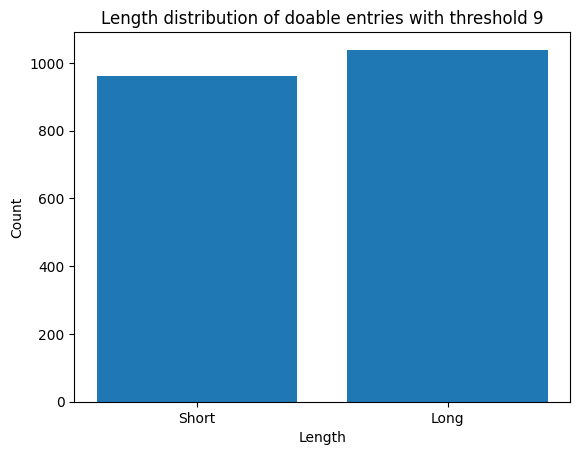

<Figure size 400x200 with 0 Axes>

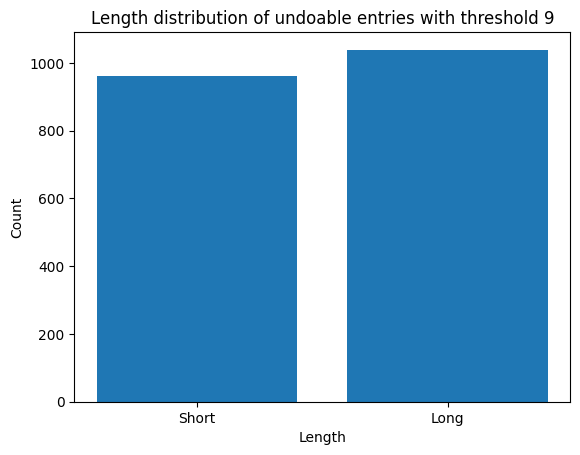

<Figure size 400x200 with 0 Axes>

In [22]:
print(count_lengths(undoable_task_set_length))
threshold = 9


doable_short = [item for item in doable_task_set_length if len(tokenizer.tokenize(item['prompt'])) <= threshold]

print(len(doable_short))
doable_mid = [item for item in doable_task_set_length if len(tokenizer.tokenize(item['prompt'])) > threshold]

doable_mid = random.sample(doable_mid, 2000-len(doable_short))

doable_task_set_length_sample = doable_short + doable_mid

plt.bar(['Short', 'Long'], [len(doable_short), len(doable_mid)])
plt.title('Length distribution of doable entries with threshold {}'.format(threshold))
plt.xlabel('Length')
plt.ylabel('Count')
plt.figure(figsize=(4, 2))
plt.show()

undoable_task_short = [item for item in undoable_task_set_length if len(tokenizer.tokenize(item['prompt'])) <= threshold]
undoable_task_long = [item for item in undoable_task_set_length if len(tokenizer.tokenize(item['prompt'])) > threshold]

undoable_short = random.sample(undoable_task_short,len(doable_short))
undoable_mid = random.sample(undoable_task_long,len(doable_mid))

undoable_task_set_length_sample = undoable_short + undoable_mid
plt.bar(['Short', 'Long'], [len(undoable_short), len(undoable_mid)])
plt.title('Length distribution of undoable entries with threshold {}'.format(threshold))
plt.xlabel('Length')
plt.ylabel('Count')
plt.figure(figsize=(4, 2))
plt.show()



In [23]:
# calculate average token length
total_tokens_doable = 0
for item in doable_task_set_length_sample:
    total_tokens_doable += len(tokenizer.tokenize(item['prompt']))

average_token_length = total_tokens_doable / len(doable_task_set_length_sample)
print(f"Average token length of doable entries: {average_token_length}")

total_tokens_undoable = 0
for item in undoable_task_set_length_sample:
    total_tokens_undoable += len(tokenizer.tokenize(item['prompt']))

average_token_length = total_tokens_undoable / len(undoable_task_set_length_sample)
print(f"Average token length of undoable entries: {average_token_length}")


Average token length of doable entries: 10.0885
Average token length of undoable entries: 9.5365


In [24]:

print(len(doable_task_set_length_sample))
print(doable_task_set_length_sample[0])

print(len(undoable_task_set_length_sample))
print(undoable_task_set_length_sample[0])

with open('doable_task_2k.json', 'w') as file:
    json.dump(doable_task_set_length_sample, file, indent=4)

with open('undoable_task_2k.json', 'w') as file:
    json.dump(undoable_task_set_length_sample, file, indent=4)

2000
{'prompt': 'Translate a short passage from French to English.', 'category': 5}
2000
{'prompt': 'Create a digital diary from daily activities,', 'category': 3}


Number of different First word:  62


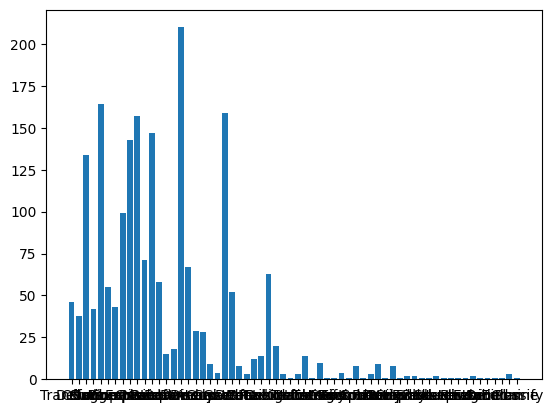

Translate: 46	Offer: 38	Describe: 134	Outline: 42	Suggest: 164	
Summarize: 55	Propose: 43	Compose: 99	Explain: 143	Create: 157	
Provide: 71	List: 147	Compare: 58	Define: 15	Recommend: 18	
Write: 210	Develop: 67	Discuss: 29	Analyze: 28	Correct: 9	
Give: 4	Generate: 159	Draft: 52	What: 8	Detail: 3	
Convert: 12	Predict: 14	Design: 63	Calculate: 20	Craft: 3	
Teach: 1	Debate: 3	Invent: 14	Listing: 1	Identify: 10	
Transform: 1	Mentor: 1	Construct: 4	Decipher: 1	Formulate: 8	
Submit: 1	Correctly: 3	Rewrite: 9	Devise: 1	Compile: 8	
Convey: 1	Paraphrase: 2	Solve: 2	Evaluate: 1	Produce: 1	
Sketch: 2	Interpret: 1	Illustrate: 1	list: 1	Reword: 1	
Imagine: 2	Sum: 1	Exhibition: 1	Find: 1	Determine: 1	
Plan: 3	Classify: 1	

Total numbers :  2000
Number of different First word:  409


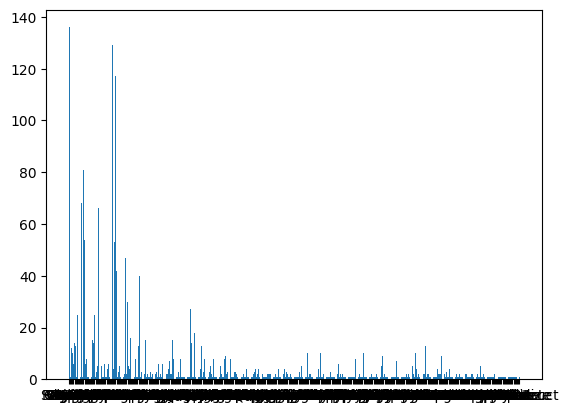

Create: 136	Register: 1	Build: 12	Schedule: 10	Lead: 6	
Organize: 14	Simulate: 13	Audition: 1	Make: 25	Program: 1	
Judge: 1	Identify: 68	Mop: 1	Describe: 81	Design: 54	
Articulate: 6	Update: 8	Upgrade: 1	Formulate: 1	Book: 51	
Renew: 1	Go: 15	Host: 14	Think: 25	Pioneer: 1	
Jump: 3	Record: 5	Explain: 66	Ride: 4	Take: 5	
Counter: 1	Evaluate: 1	Write: 6	Unclog: 1	Flyboard: 1	
Sketch: 4	Repair: 6	Film: 1	Download: 11	Generate: 129	
Climb: 4	Order: 53	Find: 117	Reflect: 42	Score: 1	
Restore: 3	Learn: 5	Paddle: 1	Perform: 4	Pass: 1	
Cook: 2	Recall: 47	Craft: 2	Convert: 30	Compose: 5	
Practice: 4	Compare: 16	Participate: 6	Snowshoe: 1	Delve: 1	
Locate: 8	Turn: 1	Rearrange: 1	Imagine: 13	Detect: 40	
Recolor: 1	Track: 3	Recommend: 23	Skate: 2	Visualize: 15	
Embroider: 1	Dye: 2	Whistle: 1	Warm: 1	Clean: 3	
Distinguish: 1	Swim: 2	Subscribe: 8	Study: 2	Lay: 3	
Adopt: 1	Plan: 6	Rake: 1	Navigate: 2	94.: 1	
Assemble: 6	Set: 13	Map: 2	Paint: 2	Edit: 2	
Construct: 4	Decorate: 7	Water: 2	Tie: 2	Develop:

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def get_first_word(prompt):
    return prompt.split()[0]

def analyze_first_words(task_list):
    first_words = []
    for task in task_list:
        first_word = get_first_word(task['prompt'])
        first_words.append(first_word)


    word_counts = Counter(first_words)

    print("Number of different First word: ",len(word_counts))


    words = list(word_counts.keys())
    counts = list(word_counts.values())

    x = np.arange(len(words))

    plt.bar(x, counts)
    plt.xticks(x, words)
    plt.show()


    for i, (word, count) in enumerate(word_counts.items()):
        print(f"{word}: {count}", end="\t")
        if i % 5 == 4:
            print()
    print("\n")
    print("Total numbers : ",len(task_list))

# 使用这个函数
analyze_first_words(doable_task_set_length_sample)
analyze_first_words(undoable_task_set_length_sample)